<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-January/blob/main/Data%20Augmentation/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 8s 0us/step


In [3]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/root/.keras/datasets/flower_photos/daisy/3415180846_d7b5cced14_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/7191221492_610035de7c_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/1140299375_3aa7024466.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/4544110929_a7de65d65f_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/14087947408_9779257411_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/20596941736_f2c5f496cf.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3909587261_f8cd3e7fe7.jpg')]

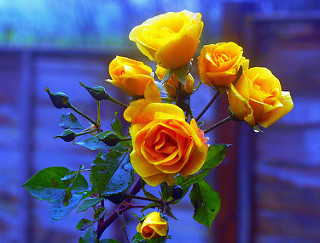

In [7]:
PIL.Image.open(str(roses[1]))

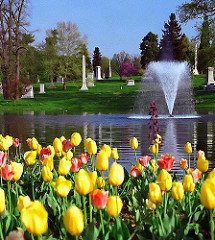

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
str(flowers_images_dict['roses'][0])

'/root/.keras/datasets/flower_photos/roses/21347496068_f4d3339607.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [13]:
img.shape

(333, 500, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 [==============================] - 14s 45ms/step - loss: 1.3662 - accuracy: 0.4070
Epoch 2/30
86/86 [==============================] - 4s 45ms/step - loss: 1.0082 - accuracy: 0.5938
Epoch 3/30
86/86 [==============================] - 4s 45ms/step - loss: 0.8554 - accuracy: 0.6722
Epoch 4/30
86/86 [==============================] - 4s 45ms/step - loss: 0.6745 - accuracy: 0.7438
Epoch 5/30
86/86 [==============================] - 4s 45ms/step - loss: 0.4931 - accuracy: 0.8303
Epoch 6/30
86/86 [==============================] - 4s 45ms/step - loss: 0.2688 - accuracy: 0.9037
Epoch 7/30
86/86 [==============================] - 4s 45ms/step - loss: 0.1454 - accuracy: 0.9586
Epoch 8/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0892 - accuracy: 0.9738
Epoch 9/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0509 - accuracy: 0.9855
Epoch 10/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0204 - accuracy: 0.9967
Epoch 11

In [20]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 30ms/step - loss: 2.8716 - accuracy: 0.6656


[2.8716397285461426, 0.6655773520469666]

Data Augmentation


In [22]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

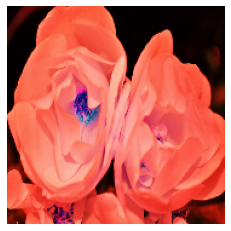

In [23]:
plt.axis('off')
plt.imshow(X[0])

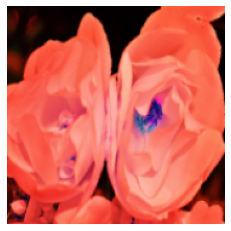

In [24]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [25]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 6s 53ms/step - loss: 1.5058 - accuracy: 0.3463
Epoch 2/30
86/86 [==============================] - 5s 53ms/step - loss: 1.1329 - accuracy: 0.5338
Epoch 3/30
86/86 [==============================] - 5s 55ms/step - loss: 0.9949 - accuracy: 0.6123
Epoch 4/30
86/86 [==============================] - 5s 54ms/step - loss: 0.9467 - accuracy: 0.6330
Epoch 5/30
86/86 [==============================] - 4s 51ms/step - loss: 0.8761 - accuracy: 0.6704
Epoch 6/30
86/86 [==============================] - 4s 52ms/step - loss: 0.8170 - accuracy: 0.6820
Epoch 7/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7665 - accuracy: 0.7100
Epoch 8/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7496 - accuracy: 0.7191
Epoch 9/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7172 - accuracy: 0.7315
Epoch 10/30
86/86 [==============================] - 4s 52ms/step - loss: 0.6961 - accuracy: 0.7326
Epoch 11/

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 30ms/step - loss: 0.9068 - accuracy: 0.7386


[0.9068094491958618, 0.7385621070861816]